 **Task 1 :
Plot all sample points (train data) from both classes, but samples from the same class should have
the same color and marker.**

In [2]:
import matplotlib.pyplot as plt

In [3]:
trainData = {}
entry = []

with open("train-perceptron.txt") as f:
    for line in f:
        entry = line.split(" ")
        if (entry[2][-1] == '\n'):
            classInfo =  entry[2][:-1]
        else:
            classInfo =  entry[2]
        trainData[(float(entry[0]),float(entry[1]))] = float(classInfo)
    print(trainData)

{(1.0, 1.0): 1.0, (1.0, -1.0): 1.0, (2.0, 2.5): 2.0, (0.0, 2.0): 2.0, (2.0, 3.0): 2.0, (4.0, 5.0): 1.0}


In [4]:
trainData1x = []
trainData1y = []
trainData2x = []
trainData2y = []

for coor , classinfo in trainData.items():
    if(classinfo == 1):
        trainData1x.append(coor[0]);
        trainData1y.append(coor[1]);
    else:
        trainData2x.append(coor[0]);
        trainData2y.append(coor[1]);
    
print(trainData1x , trainData1y)
print(trainData2x , trainData2y)


[1.0, 1.0, 4.0] [1.0, -1.0, 5.0]
[2.0, 0.0, 2.0] [2.5, 2.0, 3.0]


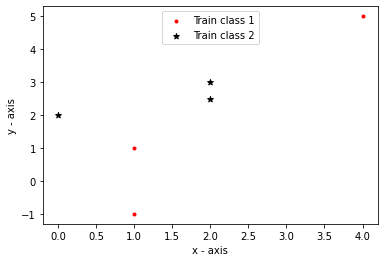

In [5]:
plt.scatter(trainData1x, trainData1y, color = 'r', marker = ".", label = 'Train class 1')

plt.scatter(trainData2x, trainData2y, color = 'k', marker = "*", label = 'Train class 2')

plt.xlabel('x - axis')
plt.ylabel('y - axis')

plt.legend(loc = 'upper center')

plt.show()


The data is not linearly seperable.



# Task 2 :

Generate the
high dimensional sample points y, and normalization.

In [6]:
highDimTrainData = {}

for coor , classinfo in trainData.items():
    if(classinfo == 1):
        highDimTrainData[(coor[0]*coor[0] , coor[1]*coor[1], coor[0]*coor[1], coor[0], coor[1], 1 )] = classinfo 
    else:
        highDimTrainData[(-coor[0]*coor[0] , -coor[1]*coor[1], -coor[0]*coor[1], -coor[0], -coor[1], -1 )] = classinfo 
    
    
highDimTrainData

{(1.0, 1.0, 1.0, 1.0, 1.0, 1): 1.0,
 (1.0, 1.0, -1.0, 1.0, -1.0, 1): 1.0,
 (-4.0, -6.25, -5.0, -2.0, -2.5, -1): 2.0,
 (-0.0, -4.0, -0.0, -0.0, -2.0, -1): 2.0,
 (-4.0, -9.0, -6.0, -2.0, -3.0, -1): 2.0,
 (16.0, 25.0, 20.0, 4.0, 5.0, 1): 1.0}

# Task 3 : Using Perceptron



In [7]:
 import numpy as np

In [8]:
numberOfInputs = len([trainData.keys()][0])
WeightVector = np.array([1] * numberOfInputs)
WeightVector


array([1, 1, 1, 1, 1, 1])

In [9]:
def findMisClssified(WeightVector , yValues):
    if (np.dot(WeightVector , yValues) > 0 ):
        return False
    else:
        return True

In [10]:
yValues =  np.array([1] * numberOfInputs)
findMisClssified(WeightVector , yValues)

False

In [11]:
NumberOfIterations = 200 

In [12]:
np.sum([0.1, 0.1, 0.1, 0.1, 0.1, 0.1], axis = 0)

0.6

In [13]:
def updateWeights(WeightVector ,yValues , misClassifiedIndices ,LearningRate, batchFlag):
    
    if(batchFlag):
        sumOfMisClassifiedIndices = np.sum(yValues[misClassifiedIndices], axis = 0)
    else:
        sumOfMisClassifiedIndices = yValues[misClassifiedIndices]
    
    
    updateFactor = sumOfMisClassifiedIndices*LearningRate
    
    WeightVector = np.sum([WeightVector ,updateFactor ], axis = 0)
    
    print(sumOfMisClassifiedIndices)
    print(updateFactor)
        
    
    return WeightVector;

In [14]:
def runPerceptron(highDimTrainData,WeightVector,NumberOfIterations,LearningRate,batchFlag):
    yValues =  np.array(list(highDimTrainData.keys()))
    
    while( NumberOfIterations>0):
        misClassifiedIndices = []
        print("")
        interation = 200 - NumberOfIterations + 1
        print("iteration: " , interation)
        
        for i  in np.arange(len(yValues)):
            
            if(findMisClssified(WeightVector , yValues[i])):
                misClassifiedIndices.append(i)
                print("misclassified at :" , i )
                
                if(not batchFlag):
                    WeightVector = updateWeights(WeightVector,yValues ,np.array([i]),LearningRate,batchFlag)
        
        if(batchFlag):
            WeightVector = updateWeights(WeightVector,yValues ,misClassifiedIndices,LearningRate,batchFlag)
        if(len(misClassifiedIndices)<1):
            
            break
        NumberOfIterations-=1
        
        
    return interation

In [24]:
def runSetup(batchFlag ,stepSize,LearningRate ,WeightVector, highDimTrainData , NumberOfIterations):
    numberOfInterationsHappened = []
    while(LearningRate < 1.0):
        #WeightVector = np.array([1] * numberOfInputs)
        interation = runPerceptron(highDimTrainData, WeightVector, NumberOfIterations, LearningRate, batchFlag)
        LearningRate += stepSize
        print(interation)
        numberOfInterationsHappened.append(interation)
    
    return numberOfInterationsHappened
    

In [20]:
import pandas as pd




**Many at a time**

In [41]:
batchFlag = True
stepSize = 0.1
LearningRate = 0.1
WeightVector = np.array([1] * numberOfInputs)
NumberOfIterations = 200

task3many = runSetup(batchFlag ,stepSize,LearningRate ,WeightVector, highDimTrainData , NumberOfIterations)
task3many


iteration:  1
misclassified at : 2
misclassified at : 3
misclassified at : 4
[ -8.   -19.25 -11.    -4.    -7.5   -3.  ]
[-0.8   -1.925 -1.1   -0.4   -0.75  -0.3  ]

iteration:  2
misclassified at : 5
[16. 25. 20.  4.  5.  1.]
[1.6 2.5 2.  0.4 0.5 0.1]

iteration:  3
misclassified at : 2
misclassified at : 3
misclassified at : 4
[ -8.   -19.25 -11.    -4.    -7.5   -3.  ]
[-0.8   -1.925 -1.1   -0.4   -0.75  -0.3  ]

iteration:  4
misclassified at : 2
misclassified at : 4
[ -8.   -15.25 -11.    -4.    -5.5   -2.  ]
[-0.8   -1.525 -1.1   -0.4   -0.55  -0.2  ]

iteration:  5
misclassified at : 0
misclassified at : 1
misclassified at : 5
[18. 27. 20.  6.  5.  3.]
[1.8 2.7 2.  0.6 0.5 0.3]

iteration:  6
misclassified at : 2
misclassified at : 3
misclassified at : 4
[ -8.   -19.25 -11.    -4.    -7.5   -3.  ]
[-0.8   -1.925 -1.1   -0.4   -0.75  -0.3  ]

iteration:  7
misclassified at : 2
[-4.   -6.25 -5.   -2.   -2.5  -1.  ]
[-0.4   -0.625 -0.5   -0.2   -0.25  -0.1  ]

iteration:  8
miscla

[102, 104, 91, 116, 105, 114, 91, 91, 105, 93]

**One at a time**

In [42]:
batchFlag = False
stepSize = 0.1
LearningRate = 0.1
WeightVector = np.array([1] * numberOfInputs)
NumberOfIterations = 200

task3one = runSetup(batchFlag ,stepSize,LearningRate ,WeightVector, highDimTrainData , NumberOfIterations)
task3one


iteration:  1
misclassified at : 2
[[-4.   -6.25 -5.   -2.   -2.5  -1.  ]]
[[-0.4   -0.625 -0.5   -0.2   -0.25  -0.1  ]]
misclassified at : 3
[[-0. -4. -0. -0. -2. -1.]]
[[-0.  -0.4 -0.  -0.  -0.2 -0.1]]
misclassified at : 4
[[-4. -9. -6. -2. -3. -1.]]
[[-0.4 -0.9 -0.6 -0.2 -0.3 -0.1]]
misclassified at : 5
[[16. 25. 20.  4.  5.  1.]]
[[1.6 2.5 2.  0.4 0.5 0.1]]

iteration:  2
misclassified at : 2
[[-4.   -6.25 -5.   -2.   -2.5  -1.  ]]
[[-0.4   -0.625 -0.5   -0.2   -0.25  -0.1  ]]
misclassified at : 3
[[-0. -4. -0. -0. -2. -1.]]
[[-0.  -0.4 -0.  -0.  -0.2 -0.1]]
misclassified at : 4
[[-4. -9. -6. -2. -3. -1.]]
[[-0.4 -0.9 -0.6 -0.2 -0.3 -0.1]]

iteration:  3
misclassified at : 2
[[-4.   -6.25 -5.   -2.   -2.5  -1.  ]]
[[-0.4   -0.625 -0.5   -0.2   -0.25  -0.1  ]]
misclassified at : 5
[[16. 25. 20.  4.  5.  1.]]
[[1.6 2.5 2.  0.4 0.5 0.1]]

iteration:  4
misclassified at : 2
[[-4.   -6.25 -5.   -2.   -2.5  -1.  ]]
[[-0.4   -0.625 -0.5   -0.2   -0.25  -0.1  ]]
misclassified at : 3
[[-0.

[6, 147, 149, 149, 141, 157, 136, 137, 140, 141]

In [43]:
ManyAtaTime = pd.Series(task3many, name='Many at a time',index=[.1,.2 ,.3 ,.4 ,.5 ,.6,.7,.8,.9,1.0])
ManyAtaTime

0.1    102
0.2    104
0.3     91
0.4    116
0.5    105
0.6    114
0.7     91
0.8     91
0.9    105
1.0     93
Name: Many at a time, dtype: int64

In [44]:
OneAtaTime = pd.Series(task3one, name='One at a time',index=[.1,.2 ,.3 ,.4 ,.5 ,.6,.7,.8,.9,1.0])
OneAtaTime

0.1      6
0.2    147
0.3    149
0.4    149
0.5    141
0.6    157
0.7    136
0.8    137
0.9    140
1.0    141
Name: One at a time, dtype: int64

In [45]:
task3ans = pd.DataFrame({'  One at a time': OneAtaTime, '  Many at a time': ManyAtaTime})
print(task3ans)

       One at a time    Many at a time
0.1                6               102
0.2              147               104
0.3              149                91
0.4              149               116
0.5              141               105
0.6              157               114
0.7              136                91
0.8              137                91
0.9              140               105
1.0              141                93


# Task 4

**Bar chart for weight all 1**

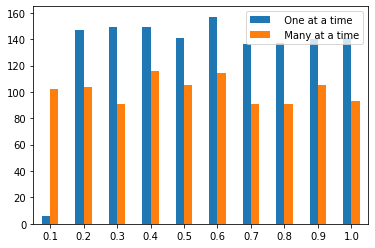

In [75]:
all1chart = task3ans.plot.bar(rot=0)

**Setup 2**

In [40]:
batchFlag = False
stepSize = 0.1
LearningRate = 0.1
WeightVector = np.array([0] * numberOfInputs)
NumberOfIterations = 200

task4setup2one = runSetup(batchFlag ,stepSize,LearningRate ,WeightVector, highDimTrainData , NumberOfIterations)
task4setup2one


iteration:  1
misclassified at : 0
[[1. 1. 1. 1. 1. 1.]]
[[0.1 0.1 0.1 0.1 0.1 0.1]]
misclassified at : 2
[[-4.   -6.25 -5.   -2.   -2.5  -1.  ]]
[[-0.4   -0.625 -0.5   -0.2   -0.25  -0.1  ]]
misclassified at : 5
[[16. 25. 20.  4.  5.  1.]]
[[1.6 2.5 2.  0.4 0.5 0.1]]

iteration:  2
misclassified at : 2
[[-4.   -6.25 -5.   -2.   -2.5  -1.  ]]
[[-0.4   -0.625 -0.5   -0.2   -0.25  -0.1  ]]
misclassified at : 3
[[-0. -4. -0. -0. -2. -1.]]
[[-0.  -0.4 -0.  -0.  -0.2 -0.1]]
misclassified at : 4
[[-4. -9. -6. -2. -3. -1.]]
[[-0.4 -0.9 -0.6 -0.2 -0.3 -0.1]]

iteration:  3
misclassified at : 2
[[-4.   -6.25 -5.   -2.   -2.5  -1.  ]]
[[-0.4   -0.625 -0.5   -0.2   -0.25  -0.1  ]]
misclassified at : 5
[[16. 25. 20.  4.  5.  1.]]
[[1.6 2.5 2.  0.4 0.5 0.1]]

iteration:  4
misclassified at : 2
[[-4.   -6.25 -5.   -2.   -2.5  -1.  ]]
[[-0.4   -0.625 -0.5   -0.2   -0.25  -0.1  ]]
misclassified at : 3
[[-0. -4. -0. -0. -2. -1.]]
[[-0.  -0.4 -0.  -0.  -0.2 -0.1]]
misclassified at : 4
[[-4. -9. -6. -2.

[141, 141, 141, 141, 141, 141, 141, 141, 141, 141]

In [46]:
batchFlag = True
stepSize = 0.1
LearningRate = 0.1
WeightVector = np.array([0] * numberOfInputs)
NumberOfIterations = 200

task4setup2many = runSetup(batchFlag ,stepSize,LearningRate ,WeightVector, highDimTrainData , NumberOfIterations)
task4setup2many


iteration:  1
misclassified at : 0
misclassified at : 1
misclassified at : 2
misclassified at : 3
misclassified at : 4
misclassified at : 5
[10.    7.75  9.    2.   -2.5   0.  ]
[ 1.     0.775  0.9    0.2   -0.25   0.   ]

iteration:  2
misclassified at : 2
misclassified at : 3
misclassified at : 4
[ -8.   -19.25 -11.    -4.    -7.5   -3.  ]
[-0.8   -1.925 -1.1   -0.4   -0.75  -0.3  ]

iteration:  3
misclassified at : 0
misclassified at : 1
misclassified at : 5
[18. 27. 20.  6.  5.  3.]
[1.8 2.7 2.  0.6 0.5 0.3]

iteration:  4
misclassified at : 2
misclassified at : 3
misclassified at : 4
[ -8.   -19.25 -11.    -4.    -7.5   -3.  ]
[-0.8   -1.925 -1.1   -0.4   -0.75  -0.3  ]

iteration:  5
misclassified at : 0
misclassified at : 2
misclassified at : 4
[ -7.   -14.25 -10.    -3.    -4.5   -1.  ]
[-0.7   -1.425 -1.    -0.3   -0.45  -0.1  ]

iteration:  6
misclassified at : 0
misclassified at : 5
[17. 26. 21.  5.  6.  2.]
[1.7 2.6 2.1 0.5 0.6 0.2]

iteration:  7
misclassified at : 2
misc

[105, 105, 92, 105, 92, 105, 92, 92, 92, 92]

In [49]:
task4Setup2ManyAtaTime = pd.Series(task4setup2many, name='Many at a time',index=[.1,.2 ,.3 ,.4 ,.5 ,.6,.7,.8,.9,1.0])


task4Setup2OneAtaTime = pd.Series(task4setup2one, name='One at a time',index=[.1,.2 ,.3 ,.4 ,.5 ,.6,.7,.8,.9,1.0])

task4Setup2ans = pd.DataFrame({'  One at a time': task4Setup2OneAtaTime, '  Many at a time': task4Setup2ManyAtaTime})
print(task4Setup2ans)

       One at a time    Many at a time
0.1              141               105
0.2              141               105
0.3              141                92
0.4              141               105
0.5              141                92
0.6              141               105
0.7              141                92
0.8              141                92
0.9              141                92
1.0              141                92


**Bar chart for weight all 1**

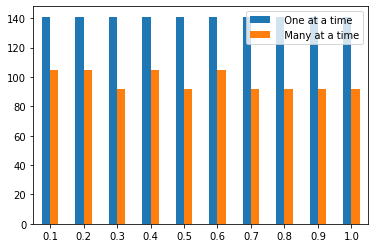

In [76]:
all0chart = task4Setup2ans.plot.bar(rot=0)

**Setup 3**

In [56]:
import random

random.seed(1)

print(random.random())

0.13436424411240122


In [58]:
random.seed(1)

[random.random()] * numberOfInputs

[0.13436424411240122,
 0.13436424411240122,
 0.13436424411240122,
 0.13436424411240122,
 0.13436424411240122,
 0.13436424411240122]

In [66]:
batchFlag = False
stepSize = 0.1
LearningRate = 0.1
random.seed(1)
WeightVector = np.array([random.random()] * numberOfInputs)
randomWeightVector = WeightVector
NumberOfIterations = 200

task4setup3one = runSetup(batchFlag ,stepSize,LearningRate ,WeightVector, highDimTrainData , NumberOfIterations)
task4setup3one


iteration:  1
misclassified at : 2
[[-4.   -6.25 -5.   -2.   -2.5  -1.  ]]
[[-0.4   -0.625 -0.5   -0.2   -0.25  -0.1  ]]
misclassified at : 5
[[16. 25. 20.  4.  5.  1.]]
[[1.6 2.5 2.  0.4 0.5 0.1]]

iteration:  2
misclassified at : 2
[[-4.   -6.25 -5.   -2.   -2.5  -1.  ]]
[[-0.4   -0.625 -0.5   -0.2   -0.25  -0.1  ]]
misclassified at : 3
[[-0. -4. -0. -0. -2. -1.]]
[[-0.  -0.4 -0.  -0.  -0.2 -0.1]]
misclassified at : 4
[[-4. -9. -6. -2. -3. -1.]]
[[-0.4 -0.9 -0.6 -0.2 -0.3 -0.1]]

iteration:  3
misclassified at : 2
[[-4.   -6.25 -5.   -2.   -2.5  -1.  ]]
[[-0.4   -0.625 -0.5   -0.2   -0.25  -0.1  ]]
misclassified at : 5
[[16. 25. 20.  4.  5.  1.]]
[[1.6 2.5 2.  0.4 0.5 0.1]]

iteration:  4
misclassified at : 2
[[-4.   -6.25 -5.   -2.   -2.5  -1.  ]]
[[-0.4   -0.625 -0.5   -0.2   -0.25  -0.1  ]]
misclassified at : 3
[[-0. -4. -0. -0. -2. -1.]]
[[-0.  -0.4 -0.  -0.  -0.2 -0.1]]
misclassified at : 4
[[-4. -9. -6. -2. -3. -1.]]
[[-0.4 -0.9 -0.6 -0.2 -0.3 -0.1]]

iteration:  5
misclassifi

[136, 157, 135, 136, 136, 148, 148, 148, 140, 140]

In [67]:
batchFlag = True
stepSize = 0.1
LearningRate = 0.1
WeightVector =  randomWeightVector
NumberOfIterations = 200

task4setup3many = runSetup(batchFlag ,stepSize,LearningRate ,WeightVector, highDimTrainData , NumberOfIterations)
task4setup3many


iteration:  1
misclassified at : 2
misclassified at : 3
misclassified at : 4
[ -8.   -19.25 -11.    -4.    -7.5   -3.  ]
[-0.8   -1.925 -1.1   -0.4   -0.75  -0.3  ]

iteration:  2
misclassified at : 0
misclassified at : 1
misclassified at : 5
[18. 27. 20.  6.  5.  3.]
[1.8 2.7 2.  0.6 0.5 0.3]

iteration:  3
misclassified at : 2
misclassified at : 3
misclassified at : 4
[ -8.   -19.25 -11.    -4.    -7.5   -3.  ]
[-0.8   -1.925 -1.1   -0.4   -0.75  -0.3  ]

iteration:  4
misclassified at : 0
misclassified at : 5
[17. 26. 21.  5.  6.  2.]
[1.7 2.6 2.1 0.5 0.6 0.2]

iteration:  5
misclassified at : 2
misclassified at : 3
misclassified at : 4
[ -8.   -19.25 -11.    -4.    -7.5   -3.  ]
[-0.8   -1.925 -1.1   -0.4   -0.75  -0.3  ]

iteration:  6
misclassified at : 2
misclassified at : 4
[ -8.   -15.25 -11.    -4.    -5.5   -2.  ]
[-0.8   -1.525 -1.1   -0.4   -0.55  -0.2  ]

iteration:  7
misclassified at : 0
misclassified at : 1
misclassified at : 5
[18. 27. 20.  6.  5.  3.]
[1.8 2.7 2.  0

[93, 122, 117, 97, 117, 116, 116, 91, 91, 91]

In [68]:
task4Setup3ManyAtaTime = pd.Series(task4setup3many, name='Many at a time',index=[.1,.2 ,.3 ,.4 ,.5 ,.6,.7,.8,.9,1.0])


task4Setup3OneAtaTime = pd.Series(task4setup3one, name='One at a time',index=[.1,.2 ,.3 ,.4 ,.5 ,.6,.7,.8,.9,1.0])

task4Setup3ans = pd.DataFrame({'  One at a time': task4Setup3OneAtaTime, '  Many at a time': task4Setup3ManyAtaTime})
print(task4Setup3ans)

       One at a time    Many at a time
0.1              136                93
0.2              157               122
0.3              135               117
0.4              136                97
0.5              136               117
0.6              148               116
0.7              148               116
0.8              148                91
0.9              140                91
1.0              140                91


**Bar chart for weight all random**

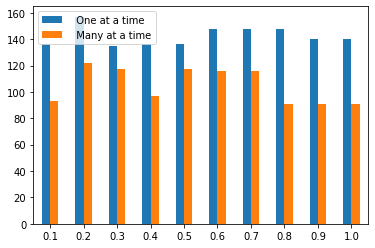

In [74]:
allrandomChart = task4Setup3ans.plot.bar(rot=0)